# Nombres premiers

La suite des nombres premiers

$$2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97 \ldots$$

intrigue les mathématiciens depuis l'antiquité. 

Dans les [Éléments d'Euclide](https://fr.wikipedia.org/wiki/%C3%89l%C3%A9ments_%28Euclide%29), on trouve déjà les énoncés suivants :

- *Tout entier $>1$ est divisible par un nombre premier*

En effet, si $n>1$ n'est pas lui-même premier, il possède des diviseurs non triviaux. Soit $p$ le plus petit
d'entre eux. Alors, $p$ est premier, car sinon il aurait un diviseur non trivial $1<d<p$ qui diviserait $n$.

- *Tout entier $>1$ se décompose en produit de facteurs premiers, de manière unique à l'ordre près des facteurs*

En itérant l'énoncé précédent, si $n$ n'est pas premier, on peut l'écrire $n=p_1n_1$ avec $p_1$ premier, et on 
recommence avec $n_1$ jusqu'à aboutir à $n_{k-1}=p_kn_k$ avec $n_k=p_{k+1}$ premier, car on ne peut pas continuer indéfiniment.
Alors, $n=p_1\cdots p_{k+1}$.

L'unicité de la décomposition est moins évidente. On a besoin de l'énoncé suivant :

- *Si un nombre premier $p$ divise un produit $ab$ alors il divise l'un des facteurs.*

On peut le prouver avec l'identité de Bézout. Si $p$ ne divise pas $a$ alors $a\wedge p=1$ et donc on peut
trouver $u,v$ tels que $au+vp=1$. Alors, 
$uab+vbp=b$ et comme $p$ divise $ab$ et $pb$, il divise $b$.

On peut maintenant en déduire l'unicité de la décomposition en facteurs premiers. Si on suppose
$$n=p_1^{a_1}p_2^{a_2}\cdots p_k^{a_k} = q_1^{b_1}q_2^{b_2}\cdots q_l^{b_l}$$
alors chaque $p_i$ divise le produit $q_1^{b_1}q_2^{b_2}\cdots q_l^{b_l}$, donc divise l'un des facteurs.
Ainsi, chaque $p_i$ est un $q_j$ et symétriquement, chaque $q_j$ est un $p_i$. Donc $k=l$ et les deux décompositions
sont identiques à l'ordre près.

- *La suite des nombres premiers est infinie.*

Si $p_1,\ldots,p_n$ sont les $n$ premiers nombres premiers,  $N=p_1p_2\cdots p_n + 1$ n'est divisible
par aucun d'entre eux. Or il est divisible par un nombre premier, la liste $p_1,\cdots,p_n$ ne les contient
donc pas tous.




Il n'existe aucune formule exacte pour le $n$-ième nombre premier $p_n$. Cependant, il existe un formule
asymptotique
$$p_n \sim_{+\infty} n \ln n,$$
conjecturée vers la fin du XVIIIème siècle par Legendre et par Gauss, et prouvée seulement un siècle plus tard,
en 1896, indépendament par Hadamard et de la Vallée-Poussin.

Ce résultat, appelé *théorème des nombres premiers*, s'appuie sur des travaux de Riemman de 1850 utilisant les
fonctions de variables complexes, et développant un idée qui remonte à Euler.

In [2]:
from ent3 import *

In [3]:
log(4)

1.3862943611198906

In [4]:
from math import *
pp = primes(100000)
qq = [float(n*log(n)) for n in range(1,len(pp))] 

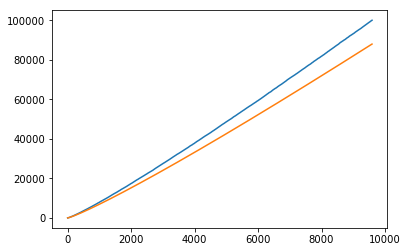

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pp)
plt.plot(qq)

### L'argument d'Euler

Partant des deux énoncés

1) La [série harmonique](https://fr.wikipedia.org/wiki/S%C3%A9rie_harmonique) $\displaystyle \sum_{n\ge 1}\frac1n = +\infty$ est divergente


2) Tout entier $n\ge 1$ s'écrit $\displaystyle\prod_{i\ge 1}p_i^{m_i}$, où les $p_i$ sont les nombres premiers, et les $m_i$ sont tous nuls sauf un nombre fini d'entre eux.

On peut donc factoriser les dénominateurs de la série harmonique et écrire
$$\sum_{n\ge 1}\frac1n = \sum_{m_1\ge 0,m_2\ge0,\cdots}\prod_{i\ge 1}\frac1{p_i^{m_i}}
=\prod_{i\ge1}\sum_{m_i\ge 0}\frac1{p_i^{m_i}}=\prod_{i\ge1}\frac1{1-\frac1{p_i}}.$$

S'il n'y avait qu'un nombre fini $N$ de nombres premiers, le terme de droite serait fini, il vaudrait
$$
\frac1{1-\frac1{2}}\frac1{1-\frac1{3}}\cdots\frac1{1-\frac1{p_N}}.$$
Or on sait qu'il ne l'est pas, donc $N$ n'existe pas et la suite des nombres premiers est infinie.

Cet argument prouve plus : on sait que si $u_n$ est une suite dans l'intervalle $[0,1[$, 
la série $\displaystyle\sum_n u_n$ et le produit infini $\displaystyle \prod_n\frac1{1-u_n}$
sont simultanément convergents ou divergents.

Donc, la série des inverses des nombres premiers $\displaystyle\sum_i\frac1{p_i}$ est divergente.

Si on fait l'hypothèse que $p_n$ admet un équivalent asymptotique simple formé avec des $n^\alpha$, $\ln^\beta(n)$ etc.,
on est amené à conjecturer que la répartition des  $p_n$ est pls dense que celle de toutes les puissances
$n^\alpha$ pour $\alpha>1$ (puisque la série de leurs inverses converge). De même, la série des inverses
de $n\ln^\beta(n)$ converge pour $\beta>1$. On est donc tenté de comparer $p_n$ à $n\ln n$. Numériquement,
ça se présente plutôt bien.

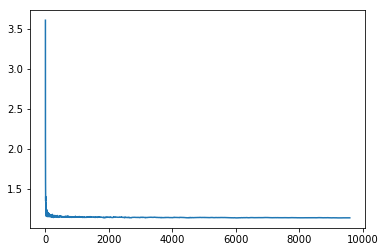

In [6]:
plt.plot([pp[n]/(n*log(n)) for n in range(2,len(qq))])

### La fonction $\zeta$ de Riemann

La factorisation de la série harmonique est une manipulation un peu hasardeuse de séries divergentes. On peut la transformer en un argument rigoureux pour les séries convergentes (dites séries de Riemann)
$$\zeta(s) = \sum_{n\ge 1}\frac1{n^s} <\infty\quad \text{pour $s>1$.}$$
Le raisonnement d'Euler conduit alors à la formule
$$\zeta(s)=\prod_{i\ge1}\frac1{1-\frac1{p_i^s}}.$$
En fait, la série $\zeta(s)$ converge pour $s\in{\mathbb C}$, pourvu que $\Re(s)>1$. La théorie des fonctions analytiques
permet de prouver qu'elle admet un unique prolongement analytique défini sur ${\mathbb C}-\{1\}$. C'est 
[ce prolongement](https://fr.wikipedia.org/wiki/Fonction_z%C3%AAta_de_Riemann)
qui a été étudié par Riemann. Il a montré que pour prouver le théorème des nombres premiers, il 
[suffisait de montrer](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_des_nombres_premiers)
que cette fonction ne s'annule pas sur la droite $\Re(s)=1$.

Remarquons au passage l'apparition de la fonction de Möbius (cf. cours précédent) dans les coefficients de l'inverse de $\zeta$
$$\frac1{\zeta(s)} = \prod_{i\ge1}\left(1-\frac1{p_i^s}\right)=\sum_{n\ge 1}\frac{\mu(n)}{n^s}.$$

Les séries de la forme
$$A(s) = \sum_{n\ge 1}\frac{a_n}{n^s}$$
sont appelées *séries de Dirichlet*. Le produit de deux telles séries s'écrit
$$A(s)B(s)=\sum_{k\ge 1}\frac{a_k}{k^s}\sum_{l\ge 1}\frac{b_l}{l^s}
=\sum_{n\ge 1}\left(\sum_{kl=n}a_kb_l\right)\frac1{n^s}
=\sum_{n\ge 1}\left(\sum_{d|n}a_db_{n/d}\right)\frac1{n^s}
$$

On peut en déduire la *formule d'inversion de Möbius*:

Si $f$ et $g$ sont deux fonctions sur les entiers positifs reliées par
$$f(n) = \sum_{d|n}g(d)$$
alors
$$g(n) = \sum_{d|n}\mu(d)g\left(\frac{n}{d}\right).$$
En effet, les deux séries (formelles) 
$$F(s)=\sum_{n\ge 1}\frac{f(n)}{n^s}\quad\text{et}\quad G(s)=\sum_{n\ge 1}\frac{g(n)}{n^s}$$
sont reliées par (prendre $B(s)=\zeta(s))$
$$F(s) = G(s)\zeta(s),\quad {\text d'où}\quad G(s) = F(s)\zeta(s)^{-1}$$
qui équivaut à la formule d'inversion.


## Tests de primalité

On a vu qu'il était difficile de factoriser de grands nombres, et donc de déterminer si un tel nombre est
vraiment premier. Les tests probabilistes comme Miller-Rabin suffisent en général pour les applications pratiques,
mais on a parfois besoin de savoir avec certitude si un nombre est premier.

On sait depuis 2002 qu'il existe un [algorithme déterministe en temps polynomial](https://fr.wikipedia.org/wiki/Test_de_primalit%C3%A9_AKS), mais il reste inapplicable pour les nombres utilisés en cryptographie.

Voici quelques méthodes plus anciennes, la première pour des nombres quelconques, la seconde pour les
*nombres de Mersenne* $M_p=2^p-1$.

### Le test de Lucas

C'est la réciproque du théorème de Fermat.
On rappelle que ce dernier est un cas particulier du théorème de Lagrange : 
dans un groupe fini, l'ordre de tout élément est un diviseur de l'ordre du groupe. 
Ainsi, si $n$ est premier,
${\mathbb Z}/n{\mathbb Z}$ est un corps, et son groupe multiplicatif est d'ordre $n−1$. 
Mais si $n$ n'est pas premier, l'ordre de ce groupe est strictement inférieur à $n−1$.
Donc, si on peut trouver un élément a d'ordre exactement n−1, n sera nécessairement premier.

Pour appliquer cette idée, on factorise $n−1$ pour avoir la liste $Q$ de ses diviseurs premiers.
On calcule ensuite pour diverses valeurs de $a$ telles que $a^{n−1}\equiv  1 \mod n$, les $a^{(n−1)/q} \mod n$ pour tous les 
$q\in Q$. 
Si pour un certain $a$ aucun n'est égal à 1, on a la preuve que n est premier.

In [7]:
# Exemple extrême n = F_4 = 65537
n = 2**16+1; print(n)
powermod(3,(n-1)//2,n) # 2 est le seul diviseur premier de n-1

65537


65536

In [8]:
# Si n-1 n'a que de petits factuers premiers, on s'en tire
n = 65421611
ff = factor(n-1); print(ff)
for f in ff: print(powermod(2,(n-1)/f[0],n), end=' ')

[(2, 1), (5, 1), (17, 1), (53, 2), (137, 1)]
65421610 23778830 54996366 10089936 52636661 

### Le test de Lucas-Lehmer.

Il permet de savoir si un [nombre de Mersenne](https://fr.wikipedia.org/wiki/Nombre_de_Mersenne_premier) est premier.
Voir [là](https://en.wikipedia.org/wiki/Lucas–Lehmer_primality_test) pour les détails.

Pour prouver que $M_p=2^p-1$ est premier, on suppose qu'il possède un diviseur premier $q$ avec $q^2\le M_p$.
Le groupe $G$ des éléments inversibles de l'anneau ${\mathbb Z}_q[\sqrt{3}]$ (formé des $a+b\alpha$ où
$a,b\in{\mathbb Z}_q$ et $\alpha=\sqrt{3}$ est un symbole vérifiant $\alpha^2=3$)
est d'ordre au plus $q^2-1 \le 2^p-2$. Si on peut trouver
un élément $a$ d'ordre supérieur à celui de ce groupe, cela prouvera qu'un tel $q$ n'existe pas.

Soient $z=2+\sqrt{3}$ et $\bar z=2-\sqrt{3}$. On a $z\bar z=1$, et la suite $s_n =z^{(2^n)}+\bar z^{(2^n)}$
vérifie $s_0=4$ et $s_n=s_{n-1}^2-2$. Si on suppose que  $M_p|s_{p-2}$, on a donc
$$ z^{(2^{p-2})}+\bar z^{(2^{p-2})} = kM_p$$
donc $z^{(2^{p-1})}=kM_pz^{(2^{p-2})}-1$, d'où
$$z^{(2^{p-1})}\equiv -1\mod q$$
et $$\ z^{(2^{p})}\equiv 1\mod q$$
Ainsi, $z$ est d'ordre $2^p$ dans $G$. Comme l'ordre de $G$ est  $< 2^p-2$, c'est impossible.

Donc, si  $M_p|s_{p-2}$, alors $M_p$ est premier.


Le [plus grand nombre premier connu](https://primes.utm.edu/largest.html#largest)
est en général un nombre de Mersenne.

## Résidus quadratiques

Puisque ${\mathbb Z}/p{\mathbb Z}$ est un corps, on peut diviser par tout élément non nul, et donc résoudre
les équations du premier degré $ax+ b=0$ (en calculant les inverses par l'algorithme d'Euclide). Pour les équations du second degré, ça devient plus compliqué. On peut toujours écrire
$$ax^2+bx+c = a\left[ \left(x+\frac{b}{2a}\right)^2-\frac{b^2}{4a^2}+\frac{c}{a}\right]$$
mais le discriminant $\Delta =b^2-4ac$ n'a pas toujours de racine carrée modulo $p$.
L'énoncé suivant permet de savoir si un nombre est un carré modulo $p$. On dit dans ce cas que
c'est un *résidu quadratique* modulo $p$.



## Le critère d'Euler

Soit $p>2$ un nombre premier, et $a$ un entier non divisible par $p$. 
Alors, $a$ est un carré modulo $p$ si et seulement si $a^{(p-1)/2}\equiv 1 \mod p$.


Remarquons que d'après Fermat, $a^{(p-1)/2}\equiv \pm 1 \mod p$. On définit le <i>symbole de Legendre</i>
par
$$\left(\frac{a}{p}\right)=\begin{cases}1&\text{si $a$ est un carré modulo $p$}\\
                                         -1 &\text{sinon}
                            \end{cases}$$

Le critère d'Euler s'énonce donc
$$\left(\frac{a}{p}\right)\equiv a^{(p-1)/2} \mod p.$$

### Preuve 
On calcule $x^{p-1}-1\mod x^2-a$ en écrivant
$$x^{p-1}-1 = \left[(x^2)^{(p-1)/2}-a^{(p-1)/2}\right] + \left[a^{(p-1)/2}-1\right]$$
(ce qui revient plus simplement à poser $x^2=a$ dans $x^{p-1}-1$, le reste est donc $a^{(p-1)/2}-1$,
qui sera 0 ssi $a$ est un carré).

Si $a^{(p-1)/2}-1=0$ dans ${\mathbb Z}/p{\mathbb Z}$, alors $x^2-a$ divise $x^{p-1}-1 = \prod_{c=1}^{p-1}(x-c)$
dans ${\mathbb Z}/p{\mathbb Z}[x]$ et possède donc deux racines dinstinctes. Dans le cas contraire,
le reste de la division est égal à $-2$, et $x^2-a$ n'a pas de racines modulo $p$.

l'argument d'Euler prouve en fait un résultat plus général.
Si $p = 1 + mn$, un entier $a$ non divisible par $p$ est une puissance $n$-ième modulo $p$ si (et seulement si) $a^m \equiv 1 \mod p$.

####  Application 1
$$ \left(\frac{a}{p}\right)\left(\frac{b}{p}\right)=\left(\frac{ab}{p}\right),$$
pour $a$, $b$ non divisibles par $p$.

#### Application 2
$$\left(\frac{-1}{p}\right)=(-1)^{(p-1)/2}.$$


## La loi de réciprocité quadratique

Elle s'énonce ainsi. Si $p$ et $q$ sont deux nombres premiers impairs distincts,
$$\left(\frac{p}{q}\right)\left(\frac{q}{p}\right)= (-1)^{\frac{(p-1)(q-1)}{4}}.$$  

Il en existe plus d'une centaine de preuves.

### Preuve de G. Rousseau 

#### (J. Austral. Math. Soc. (Series A) 51 (1991), 423-425)
C'est la plus simple. C'est une amélioration d'une variante de la cinquième preuve de Gauss, elle même due à H. Schmidt.

Elle n'utilise que le théorème des restes chinois et le critère d'Euler.

Considerons le groupe  $(\mathbb{Z}/p)^\times \times (\mathbb{Z}/q)^\times = (\mathbb{Z}/pq)^\times$ (d'après
le théorème des restes chinois).

On a trois manières naturelles de le couper en deux comme dans le lemme de Gauss, c'est à dire en deux
moitiés telle que les éléments de l'une soient les opposés des éléments de l'autre.


<ol>
<li> Prendre la première moitié de $(\mathbb{Z}/p)^\times$  et tout le second facteur</li>
<li> Prendre tour le premier facteur et la moitié de $(\mathbb{Z}/q)^\times$</li>
<li> Prendre la première moitié de $(\mathbb{Z}/pq)^\times$</li>
</ol>

Par définition, les produits de ces trois ensembles sont égaux au signe près.

<p> Les valeurs de ces produits sont (en posant $P = (p-1)/2$ et $Q=(q-1)/2$):
</p>

<ol>
<li>$(P!^{q-1}, (q-1)!^P)$</li>
<li>$((p-1)!^Q, Q!^{p-1})$</li>
<li>$\left(\frac{(p-1)!^Q P!}{q^P P!},\frac{(q-1)!^P Q!}{p^Q Q!}\right)$</li>
</ol>

En appliquant le théorème de Wilson à la seconde composante, 
on voit par le critère d'Euler que la différence de signe entre 1 et 3 est
$\left(\frac{p}{q}\right)$.  

De même, le signe reliant 2 et 3 est $\left(\frac{q}{p}\right)$.  

Donc, le signe reliant 1 et 2 est
$\left(\frac{p}{q}\right) \left(\frac{q}{p}\right)$.  

Mais pour passer de 1 à 2, on a juste changé les signes de
$\frac{p-1}{2}  \frac{q-1}{2}$ élements,
d'où le résultat.


### Le lemme de Gauss

Remarquons que le cas où $p$ ou $q$ est égal à 2 n'est pas pris en compte. Le lemme suivant, utlisé par Gauss dans
l'une de ses preuves de la loi de réciprocité, permet de répondre à la question.

>Soit $p=2k+1$ un nombre premier impair, et $A=\{a_1,\ldots,a_k\}$ in *demi-système* de résidus modulo $p$, c'est
à dire que tout entier $a$ non divisible par $p$ est congru à un $\pm a_i$.  Alors,
$$\left(\frac{a}{p}\right)=(-1)^m$$
où $m$ est le nombre de $i$ tels que $aa_i\equiv -a_j$ pour un $j$.

Posons $j=\sigma(i)$. Alors, $\sigma$ est une permutation de $1,\ldots,k$ car $aa_i\equiv\pm aa_j$ impliquerait
$a_i\equiv\pm a_j$, ce qui contredirait l'hypothèse que $A$ est un demi-système. Donc, en multipliant
toutes le congruences $aa_i\equiv \pm a_{\sigma(i)}$, on obtient
$$a^{(p-1)/2} a_1a_2\cdots a_k = (-1)^m a_{\sigma(1)}a_{\sigma(2)}\cdots a_{\sigma(k)}$$
c'est à dire $a^{(p-1)/2}=(-1)^m$.


Pour calculer $\left(\frac{2}{p}\right)$, on peut nprendre $A=\{1,2,\ldots,\frac{p-1}{2}\}$.
Alors,
$$1\lt 2a_i\le \frac{p-1}{2}\quad\text{si}\ a_i\le \frac{p-1}{4}$$
et
$$\frac{p+1}{2}\le 2a_i\le p-1\quad\text{si}\ \frac{p-1}{4}\lt a_i \le \frac{p-1}{2}$$

Donc il y a $m=\frac{p-1}{4}$ changements de signes si $p\equiv 1\ [4]$ et $m=\frac{p+1}{4}$ si
$p\equiv 3\ [4]$. Finalement
$$\left(\frac{2}{p}\right)=\begin{cases}(-1)^{(p-1)/4}&\text{si $\equiv 1\ [4]$}\\
                                        (-1)^{(p+1)/4}&\text{si $\equiv 3\ [4]$}
                                        \end{cases}
                                        $$